# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
import json

# Impor the OpenWeatherMap API key
# from api_keys import weather_api_key
weather_api_key = "e24d2a3acc4a478e443e33e1ede8c358"


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [45]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [39]:
# url = "http://api.openweathermap.org/data/2.5/weather?"
# city_url = url + "q=" + cities[0] + "&units=metric" + "&appid=" + weather_api_key


# city_weather = requests.get(city_url).json()
# city_lat = city_weather['coord']['lat']
# city_lng = city_weather['coord']['lon']
# city_max_temp = city_weather['main']['temp_max']
# city_humidity = city_weather['main']['humidity']
# city_clouds = city_weather['clouds']['all']
# city_wind = city_weather['wind']['speed']
# city_country = city_weather['sys']['country']
# city_date = city_weather['dt']

        # Append the City information into city_data list
# city_data.append({"City": city, 
#                           "Lat": city_lat, 
#                           "Lng": city_lng, 
#                           "Max Temp": city_max_temp,
#                           "Humidity": city_humidity,
#                           "Cloudiness": city_clouds,
#                           "Wind Speed": city_wind,
#                           "Country": city_country,
#                           "Date": city_date})

# print(city_weather.url)
# print(city_weather)
# print(city_data)

{'coord': {'lon': 13.5036, 'lat': 59.3793}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 0.31, 'feels_like': -3.21, 'temp_min': 0.31, 'temp_max': 0.31, 'pressure': 1004, 'humidity': 93}, 'visibility': 5000, 'wind': {'speed': 3.09, 'deg': 50}, 'clouds': {'all': 100}, 'dt': 1674168618, 'sys': {'type': 1, 'id': 1779, 'country': 'SE', 'sunrise': 1674114199, 'sunset': 1674139765}, 'timezone': 3600, 'id': 2701680, 'name': 'Karlstad', 'cod': 200}


In [46]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&units=metric" + "&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | leh
Processing Record 3 of Set 1 | fortuna
Processing Record 4 of Set 1 | blyznyuky
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 1 | aksu
Processing Record 9 of Set 1 | guerrero negro
Processing Record 10 of Set 1 | anloga
Processing Record 11 of Set 1 | coquimbo
Processing Record 12 of Set 1 | tonosho
Processing Record 13 of Set 1 | samusu
City not found. Skipping...
Processing Record 14 of Set 1 | deputatskiy
Processing Record 15 of Set 1 | korla
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | nabire
Processing Record 21 of Set 1 | kemin
Processing Rec

Processing Record 38 of Set 4 | kulhudhuffushi
Processing Record 39 of Set 4 | la mata
Processing Record 40 of Set 4 | khatanga
Processing Record 41 of Set 4 | traralgon
Processing Record 42 of Set 4 | la plaine
Processing Record 43 of Set 4 | kloulklubed
Processing Record 44 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 45 of Set 4 | thompson
Processing Record 46 of Set 4 | anchorage
Processing Record 47 of Set 4 | bargal
City not found. Skipping...
Processing Record 48 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 49 of Set 4 | komsomolskiy
Processing Record 0 of Set 5 | krasnoufimsk
Processing Record 1 of Set 5 | kavieng
Processing Record 2 of Set 5 | north bend
Processing Record 3 of Set 5 | butaritari
Processing Record 4 of Set 5 | kaitangata
Processing Record 5 of Set 5 | aksarka
Processing Record 6 of Set 5 | luderitz
Processing Record 7 of Set 5 | sao filipe
Processing Record 8 of Set 5 | leningradskiy
Processing Record 9 of Set 5 |

Processing Record 28 of Set 8 | trairi
Processing Record 29 of Set 8 | itaqui
Processing Record 30 of Set 8 | eureka
Processing Record 31 of Set 8 | the valley
Processing Record 32 of Set 8 | kruisfontein
Processing Record 33 of Set 8 | noumea
Processing Record 34 of Set 8 | paradwip
City not found. Skipping...
Processing Record 35 of Set 8 | norman wells
Processing Record 36 of Set 8 | kushiro
Processing Record 37 of Set 8 | fazalpur
Processing Record 38 of Set 8 | andros town
Processing Record 39 of Set 8 | morondava
Processing Record 40 of Set 8 | alexandria
Processing Record 41 of Set 8 | khairpur nathan shah
Processing Record 42 of Set 8 | westport
Processing Record 43 of Set 8 | leshukonskoye
Processing Record 44 of Set 8 | muros
Processing Record 45 of Set 8 | samdrup jongkhar
Processing Record 46 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 47 of Set 8 | rio cuarto
Processing Record 48 of Set 8 | isangel
Processing Record 49 of Set 8 | atbasar
Processing 

Processing Record 14 of Set 12 | kattivakkam
Processing Record 15 of Set 12 | waipawa
Processing Record 16 of Set 12 | librazhd
Processing Record 17 of Set 12 | torbay
Processing Record 18 of Set 12 | santa vitoria do palmar
Processing Record 19 of Set 12 | batagay-alyta
Processing Record 20 of Set 12 | agadez
Processing Record 21 of Set 12 | tukan
Processing Record 22 of Set 12 | havelock
Processing Record 23 of Set 12 | villazon
Processing Record 24 of Set 12 | montemarciano
Processing Record 25 of Set 12 | ascension
Processing Record 26 of Set 12 | turan
Processing Record 27 of Set 12 | rorvik
Processing Record 28 of Set 12 | sidney
Processing Record 29 of Set 12 | tommot
Processing Record 30 of Set 12 | helsinki
Processing Record 31 of Set 12 | puerto asis
Processing Record 32 of Set 12 | mujiayingzi
Processing Record 33 of Set 12 | nemuro
Processing Record 34 of Set 12 | okha
Processing Record 35 of Set 12 | talnakh
Processing Record 36 of Set 12 | oceanside
Processing Record 37 o

In [47]:
len(city_data)

560

In [48]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [49]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,1.47,92,100,1.34,US,1674168870
1,leh,34.1667,77.5833,-14.27,87,85,1.56,IN,1674168915
2,fortuna,40.5982,-124.1573,10.92,74,75,4.12,US,1674168916
3,blyznyuky,48.8578,36.5551,4.39,69,92,7.15,UA,1674168916
4,busselton,-33.6500,115.3333,20.11,56,42,5.86,AU,1674168786


In [52]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [53]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,1.47,92,100,1.34,US,1674168870
1,leh,34.1667,77.5833,-14.27,87,85,1.56,IN,1674168915
2,fortuna,40.5982,-124.1573,10.92,74,75,4.12,US,1674168916
3,blyznyuky,48.8578,36.5551,4.39,69,92,7.15,UA,1674168916
4,busselton,-33.6500,115.3333,20.11,56,42,5.86,AU,1674168786


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

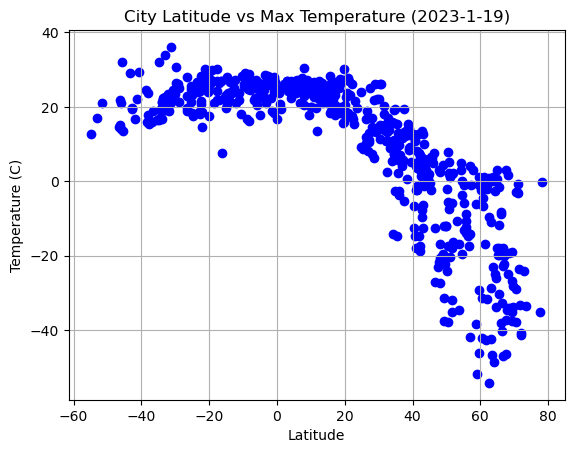

In [56]:
# Build scatter plot for latitude vs. temperature
scatter_x = city_data_df['Lat']
temp_y = city_data_df['Max Temp']
plt.scatter(scatter_x, temp_y, color="blue")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs Max Temperature (2023-1-19)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

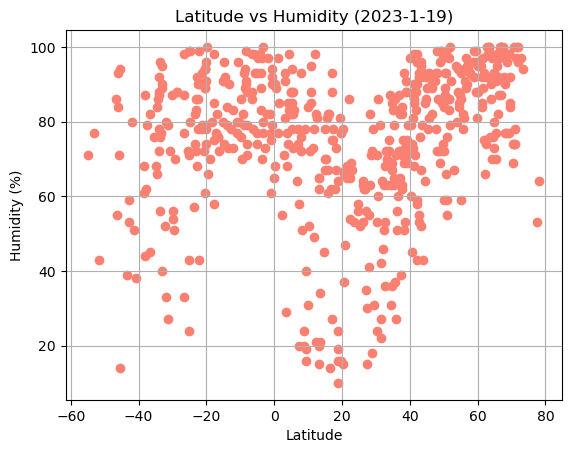

In [58]:
# Build the scatter plots for latitude vs. humidity
humid_y = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(scatter_x, humid_y, color = "salmon")
plt.title("Latitude vs Humidity (2023-1-19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

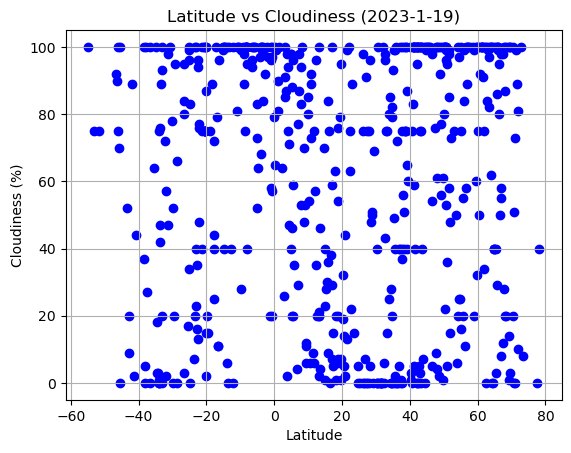

In [59]:
# Build the scatter plots for latitude vs. cloudiness
cloud_y = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(scatter_x, cloud_y, color = "blue")
plt.title("Latitude vs Cloudiness (2023-1-19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

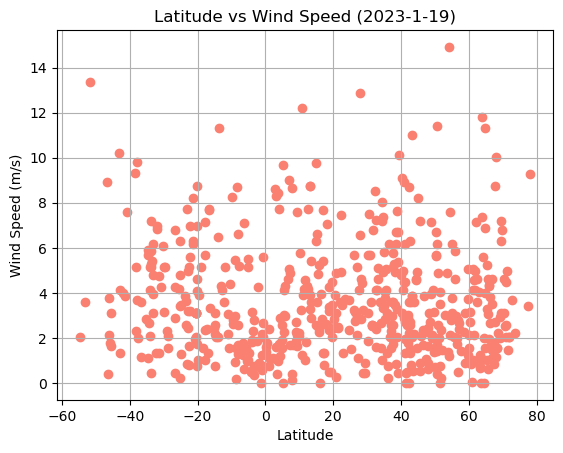

In [60]:
# Build the scatter plots for latitude vs. wind speed
wind_y = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(scatter_x, wind_y, color = "salmon")
plt.title("Latitude vs Wind Speed (2023-1-19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

# def regression(): 
#     n_slope, n_int, n_r, n_p, n_stderr = stats.linregress(x,y)

In [61]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,1.47,92,100,1.34,US,1674168870
1,leh,34.1667,77.5833,-14.27,87,85,1.56,IN,1674168915
2,fortuna,40.5982,-124.1573,10.92,74,75,4.12,US,1674168916
3,blyznyuky,48.8578,36.5551,4.39,69,92,7.15,UA,1674168916
6,aksu,41.1231,80.2644,-17.87,88,5,1.95,CN,1674168919


In [62]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,busselton,-33.6500,115.3333,20.11,56,42,5.86,AU,1674168786
5,hobart,-42.8794,147.3294,19.59,59,20,4.12,AU,1674168871
9,coquimbo,-29.9533,-71.3436,21.85,56,0,5.14,CL,1674168920
14,rikitea,-23.1203,-134.9692,25.05,72,100,0.86,PF,1674168870
15,vaini,-21.2000,-175.2000,30.09,79,40,6.17,TO,1674168924


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8328849408723663


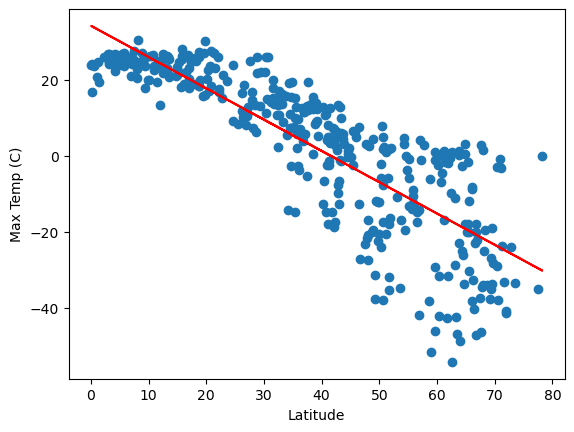

In [71]:
# Linear regression on Northern Hemisphere
north_lat = northern_hemi_df['Lat']
north_temp = northern_hemi_df['Max Temp']
n_slope, n_int, n_r, n_p, n_stderr = stats.linregress(north_lat, north_temp)
n_fit = n_slope * north_lat + n_int
plt.scatter(north_lat, north_temp)
plt.plot(north_lat, n_fit, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
print(f"The r-value is: {n_r}")



The r-value is: 0.3348377409293624


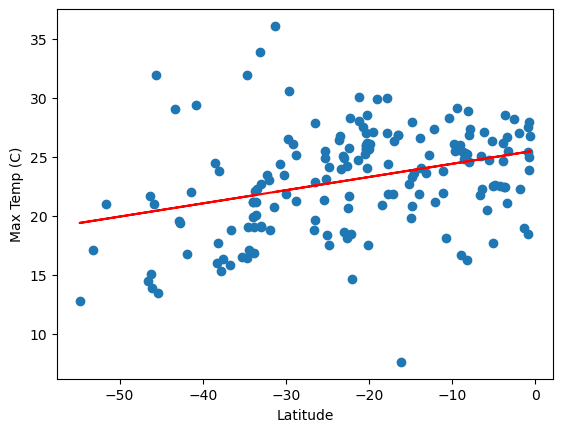

In [72]:
# Linear regression on Southern Hemisphere
south_lat = southern_hemi_df['Lat']
south_temp = southern_hemi_df['Max Temp']
s_slope, s_int, s_r, s_p, s_stderr = stats.linregress(south_lat, south_temp)
s_fit = s_slope * south_lat + s_int
plt.scatter(south_lat, south_temp)
plt.plot(south_lat, s_fit, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
print(f"The r-value is: {s_r}")

**Discussion about the linear relationship:** The relationship between latitude and temperature is pretty consistent, with r-values the represent the visual data. As you get closer to the pole in the northern hemisphere, you get lower temperatures. In the southern hemisphere, due to various geographical elements, the relationship still exists but is a lot weaker, as represented by a lower r-value.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


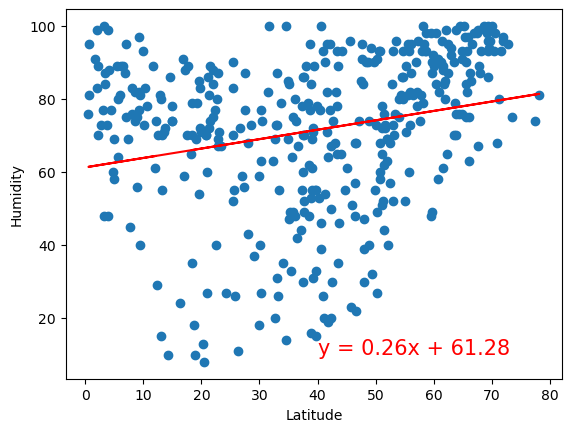

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


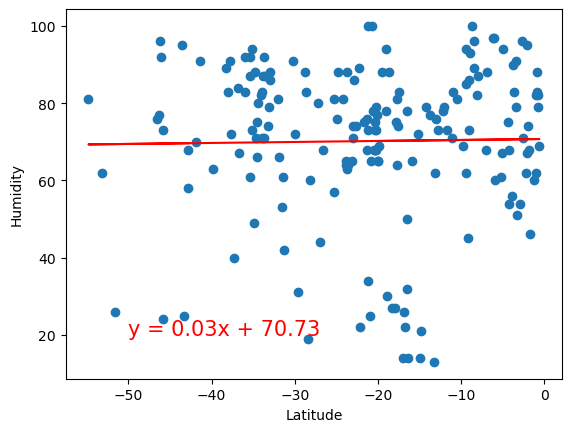

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


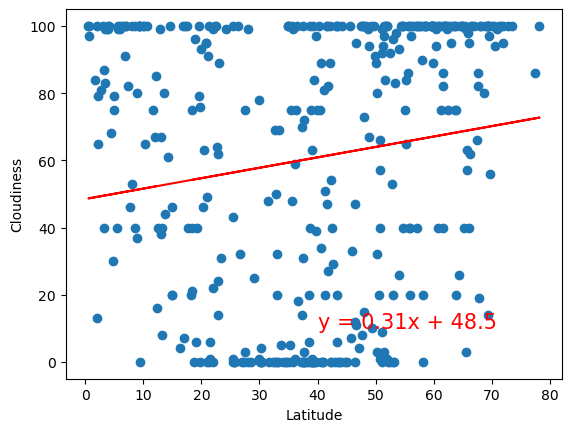

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


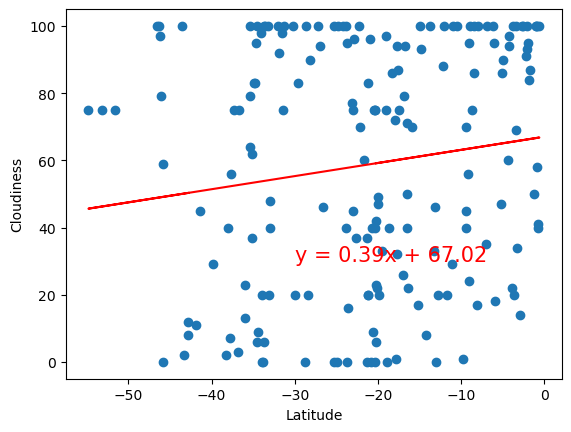

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


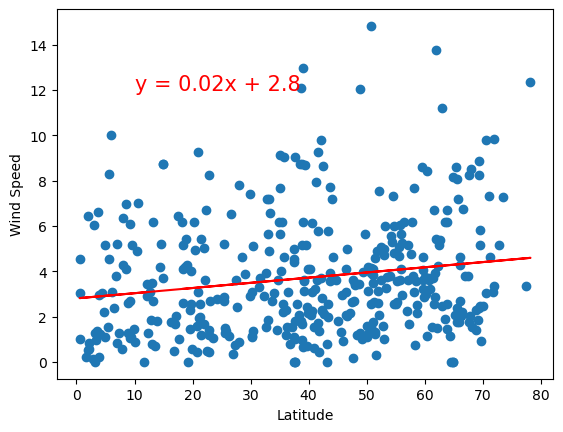

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


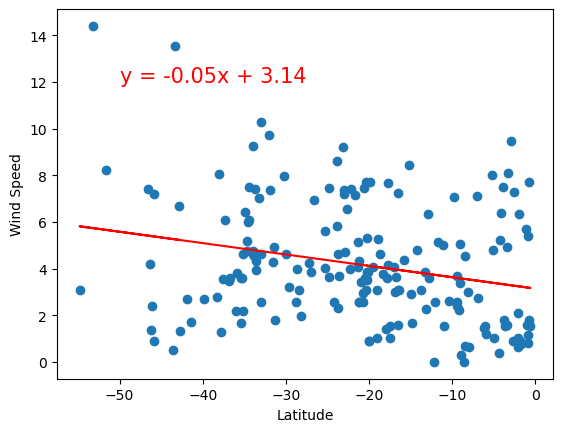

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE